In [2]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Load the dataset
file_path = '/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/processed_data.csv'
data = pd.read_csv(file_path)

# Separate numeric and non-numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler on the numeric data and transform it
scaled_numeric_data = scaler.fit_transform(data[numeric_columns])

# Convert the scaled numeric data back to a DataFrame
scaled_numeric_data_df = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

# Combine the scaled numeric data with the non-numeric data
scaled_data_df = pd.concat([data[non_numeric_columns], scaled_numeric_data_df], axis=1)

# Save the scaled data to a new CSV file
scaled_data_file_path = '/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/standardized.csv'
scaled_data_df.to_csv(scaled_data_file_path, index=False)

# Display the first few rows of the scaled data
scaled_data_df.head()


,Date,Stock,Close,Interest Rate,Inflation Rate,GDP
0,2001-01-04,AAPL,-0.845468,2.186667,0.709601,-0.915359
1,2001-01-04,F,-0.075065,2.186667,0.709601,-0.915359
2,2001-01-04,AMZN,-0.831863,2.186667,0.709601,-0.915359
3,2001-01-04,JPM,0.649913,2.186667,0.709601,-0.915359
4,2001-01-04,MS,1.711166,2.186667,0.709601,-0.915359


Medians of scaled data (should be close to 0):
Close             0.0
Interest Rate     0.0
Inflation Rate    0.0
GDP               0.0
dtype: float64

IQRs of scaled data (should be close to 1):
Close             1.0
Interest Rate     1.0
Inflation Rate    1.0
GDP               1.0
dtype: float64


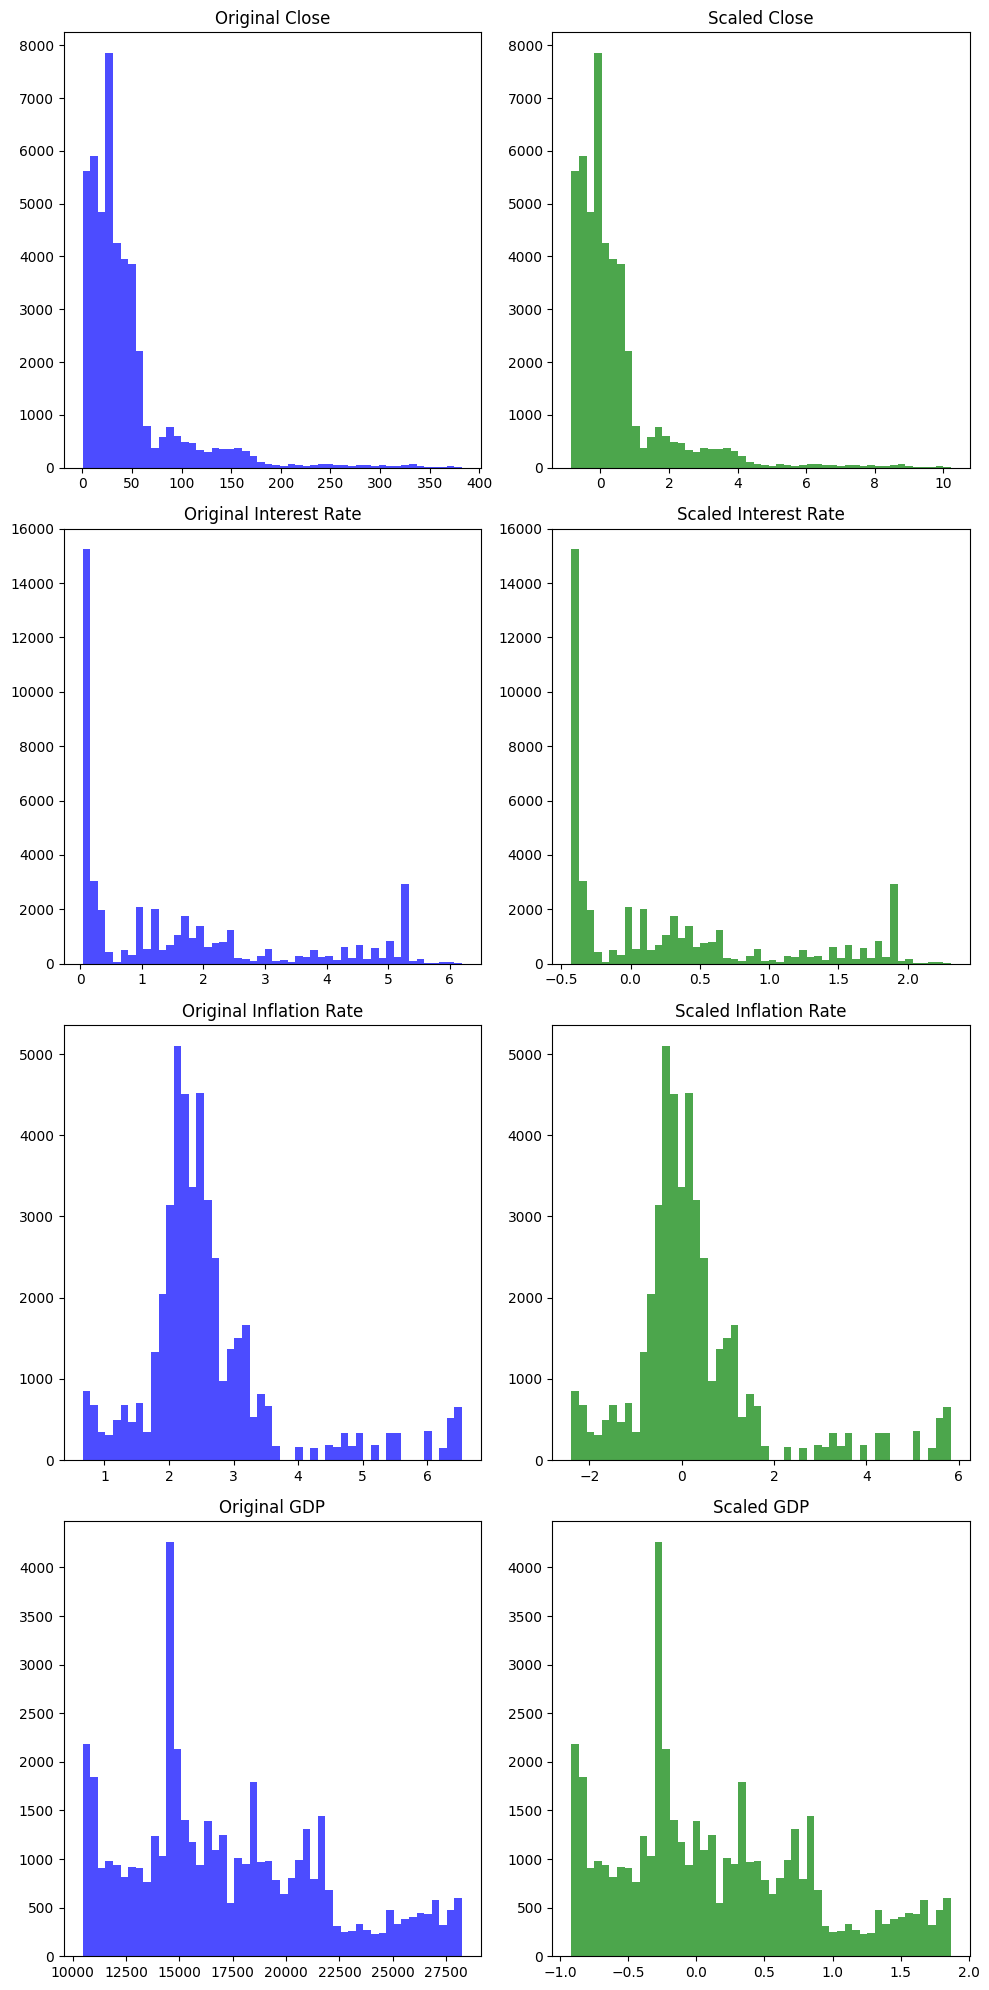


Original data types:
Date               object
Stock              object
Close             float64
Interest Rate     float64
Inflation Rate    float64
GDP               float64
dtype: object

Scaled data types:
Date               object
Stock              object
Close             float64
Interest Rate     float64
Inflation Rate    float64
GDP               float64
dtype: object


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the original and scaled datasets
original_data = pd.read_csv('/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/processed_data.csv')
scaled_data = pd.read_csv('/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/standardized.csv')

# Separate numeric columns
numeric_columns = original_data.select_dtypes(include=['number']).columns

# Test 1: Check the median and IQR of the scaled data
scaled_numeric_data = scaled_data[numeric_columns]
medians = scaled_numeric_data.median()
iqrs = scaled_numeric_data.quantile(0.75) - scaled_numeric_data.quantile(0.25)

print("Medians of scaled data (should be close to 0):")
print(medians)
print("\nIQRs of scaled data (should be close to 1):")
print(iqrs)

# Test 2: Plot the distribution of the original and scaled data
fig, axs = plt.subplots(len(numeric_columns), 2, figsize=(10, 5 * len(numeric_columns)))

for i, col in enumerate(numeric_columns):
    # Plot original data
    axs[i, 0].hist(original_data[col], bins=50, color='blue', alpha=0.7)
    axs[i, 0].set_title(f'Original {col}')
    
    # Plot scaled data
    axs[i, 1].hist(scaled_data[col], bins=50, color='green', alpha=0.7)
    axs[i, 1].set_title(f'Scaled {col}')

plt.tight_layout()
plt.show()

# Test 3: Check the data format
print("\nOriginal data types:")
print(original_data.dtypes)
print("\nScaled data types:")
print(scaled_data.dtypes)


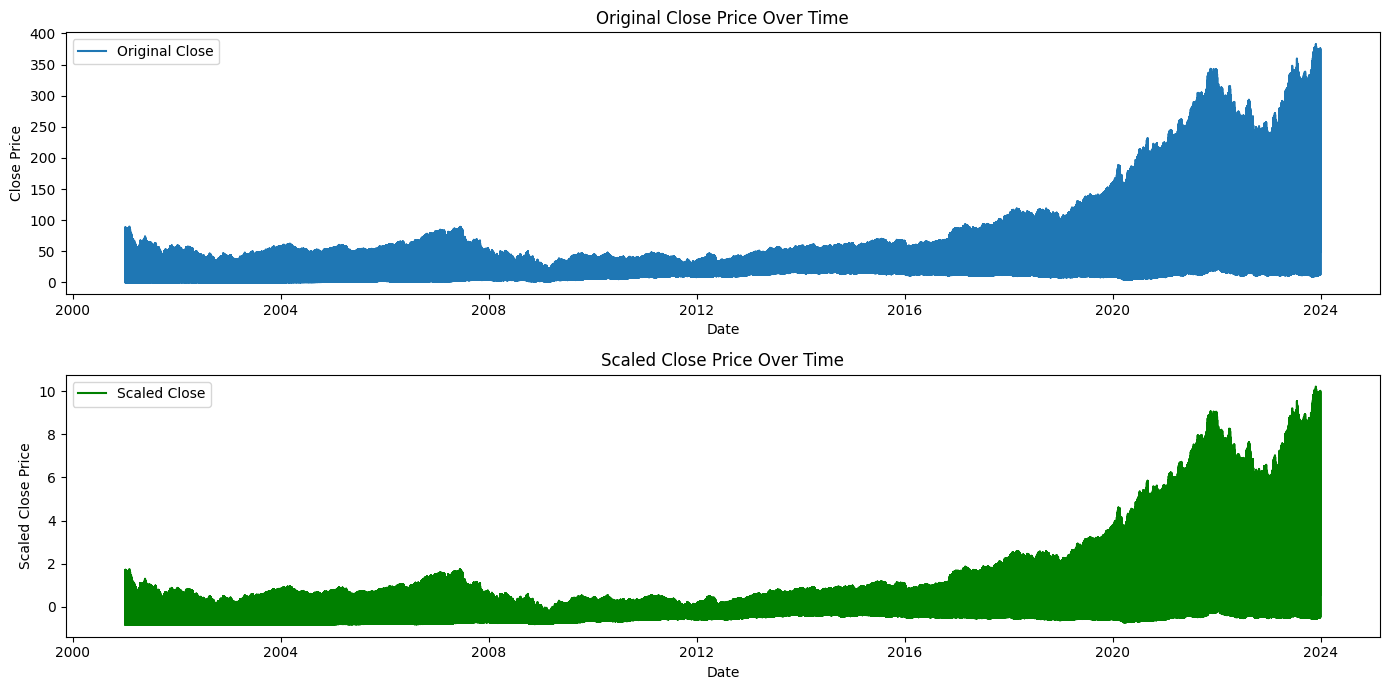

In [5]:
import matplotlib.pyplot as plt

# Load the original and scaled datasets
original_data = pd.read_csv('/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/processed_data.csv')
scaled_data = pd.read_csv('/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/standardized.csv')

# Convert the 'Date' column to datetime format
original_data['Date'] = pd.to_datetime(original_data['Date'])
scaled_data['Date'] = pd.to_datetime(scaled_data['Date'])

# Plot the 'Close' price over time
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(original_data['Date'], original_data['Close'], label='Original Close')
plt.title('Original Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(scaled_data['Date'], scaled_data['Close'], label='Scaled Close', color='green')
plt.title('Scaled Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Scaled Close Price')
plt.legend()

plt.tight_layout()
plt.show()
